In [92]:
# Loading necessary libraries and data:
import pandas as pd
import numpy as np
data = pd.read_csv('Women_Prestige_Data.csv')

In [94]:
# Checking data:
data.head(10)

,occupation_name,education,income,women,prestige,census,type
0,GOV.ADMINISTRATORS,13.11,12351,11.16,68.8,1113,prof
1,GENERAL.MANAGERS,12.26,25879,4.02,69.1,1130,prof
2,ACCOUNTANTS,12.77,9271,15.70,63.4,1171,prof
3,PURCHASING.OFFICERS,11.42,8865,9.11,56.8,1175,prof
4,CHEMISTS,14.62,8403,11.68,73.5,2111,prof
5,PHYSICISTS,15.64,11030,5.13,77.6,2113,prof
6,BIOLOGISTS,15.09,8258,25.65,72.6,2133,prof
7,ARCHITECTS,15.44,14163,2.69,78.1,2141,prof
8,CIVIL.ENGINEERS,14.52,11377,1.03,73.1,2143,prof
9,MINING.ENGINEERS,14.64,11023,0.94,68.8,2153,prof


In [95]:
# Check data type and make sure that our data is clean (has no null values, etc):
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   occupation_name  102 non-null    object 
 1   education        102 non-null    float64
 2   income           102 non-null    int64  
 3   women            102 non-null    float64
 4   prestige         102 non-null    float64
 5   census           102 non-null    int64  
 6   type             98 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 5.7+ KB


In [96]:
# Create a dataframe:
df = pd.DataFrame(data)
df.head(3)

,occupation_name,education,income,women,prestige,census,type
0,GOV.ADMINISTRATORS,13.11,12351,11.16,68.8,1113,prof
1,GENERAL.MANAGERS,12.26,25879,4.02,69.1,1130,prof
2,ACCOUNTANTS,12.77,9271,15.70,63.4,1171,prof


In [97]:
# Drop unnecessary dataset columns:
df_clean = df.drop(['census', 'type', 'occupation_name'], axis=1)
df_clean.head(3)

,education,income,women,prestige
0,13.11,12351,11.16,68.8
1,12.26,25879,4.02,69.1
2,12.77,9271,15.70,63.4


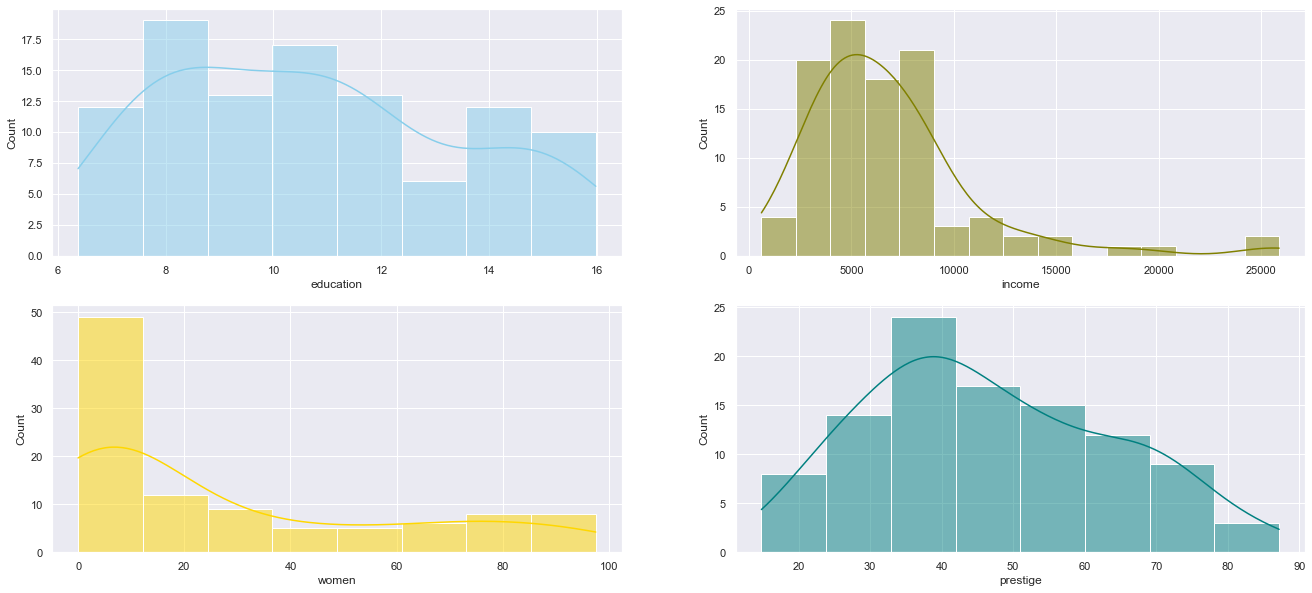

In [98]:
# Data distribution:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.histplot(data=df_clean, x="education", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_clean, x="income", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_clean, x="women", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_clean, x="prestige", kde=True, color="teal", ax=axs[1, 1])

plt.savefig('./images/histogram.jpg')


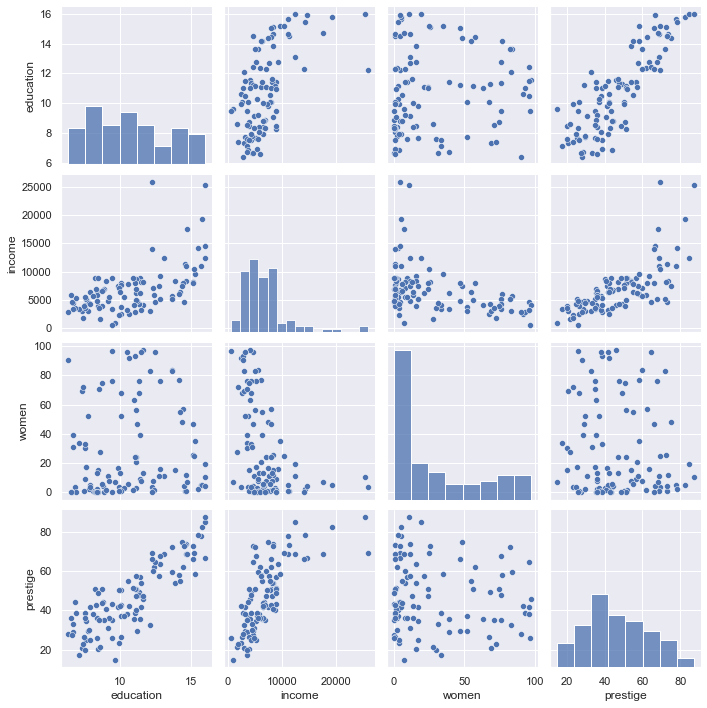

In [130]:
# correlogram
sns.pairplot(df_clean)
# plt.show()
plt.savefig('./images/correlogram.jpg')

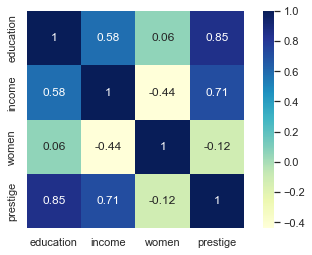

In [100]:
# Correlation
corr = df_clean.corr().round(2)
# corr

# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu",
        square=True,annot=True,cbar=True)

plt.savefig('./images/heatmap.jpg')

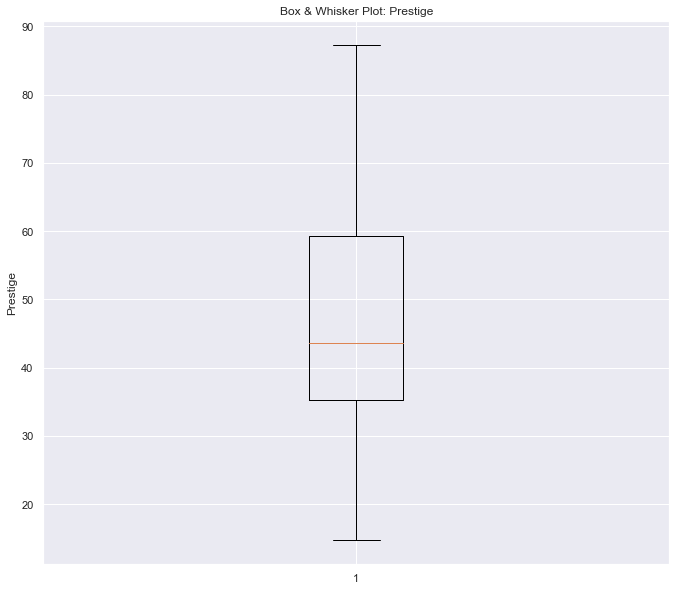

In [136]:
# box and whiskers for prestige
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,10))

plt.boxplot(df_clean['prestige'])
plt.title('Box & Whisker Plot: Prestige')
plt.ylabel('Prestige')
# plt.show()
plt.savefig('./images/boxplot.jpg')

In [102]:
# Split our preprocessed data into our features and target arrays
y = df_clean["prestige"]
X = df_clean.drop(["prestige"],axis=1)
X

,education,income,women
0,13.11,12351,11.16
1,12.26,25879,4.02
2,12.77,9271,15.70
3,11.42,8865,9.11
4,14.62,8403,11.68
...,...,...,...
97,7.58,5562,9.47
98,7.93,4224,3.59
99,8.37,4753,0.00
100,10.00,6462,13.58


In [127]:
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           6.26e-34
Time:                        14:40:30   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7943      3.239     -2.098      0.039     -13.222      -0.366
education      4.1866      0.389     10.771      0.000       3.415       4.958
income         0.0013      0.000      4.729      0.000       0.001       0.002
women         -0.0089      0.030     -0.293      0.770      -0.069       0.051
==============================================================================
Omnibus:                        0.271   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.436
Skew:                          -0.085   Prob(JB):                        0.804
Kurtosis:                       2.729   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# Adding a constant or intercept to the model :

## let's add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# Note the difference in argument order
## sm.OLS(output, input)
model1 = sm.OLS(y, X).fit() 
predictions = model1.predict(X)

# Print out the statistics
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           6.26e-34
Time:                        14:14:13   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7943      3.239     -2.098      0.039     -13.222      -0.366
education      4.1866      0.389     10.771      0.000       3.415       4.958
income         0.0013      0.000      4.729      0.000       0.001       0.002
women         -0.0089      0.030     -0.293      0.770      -0.069       0.051
==============================================================================
Omnibus:                        0.271   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.436
Skew:                          -0.085   Prob(JB):                        0.804
Kurtosis:                       2.729   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


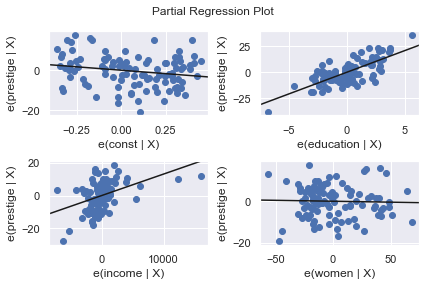

In [132]:

fig = sm.graphics.plot_partregress_grid(model1)
fig.tight_layout(pad=1.0)
# plt.show()
plt.savefig('./images/relationship.jpg')

eval_env: 1


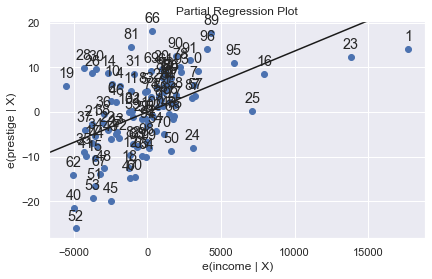

In [138]:

# let’s take a closer look at the observations:

sm.graphics.plot_partregress(
                             endog='prestige', # response
                             exog_i='income', # variable of interest
                             exog_others=['education'], # other predictors
                             data=df_clean,  # dataframe
                             obs_labels=True # show labels
                             )
# plt.show()
plt.savefig('./images/observation.jpg')

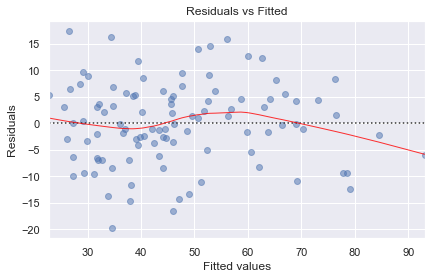

In [139]:
# fitted values
model_fitted_y = model1.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='prestige', data=df_clean, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')
plt.savefig('./images/residuals vs fitted.jpg')

In [115]:
# Test for Heteroscedasticity and Homoscedasticity:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(model1.resid, model1.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 5.064108685458127),
 ('p-value', 0.16716253262799335),
 ('f-value', 1.7065665580444875),
 ('f p-value', 0.17065136643922083)]

eval_env: 1


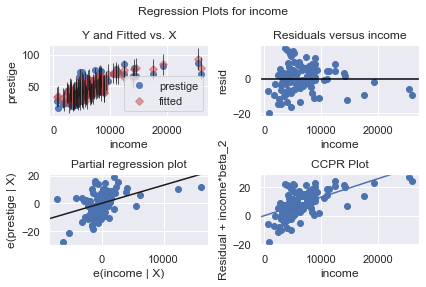

In [143]:
fig = sm.graphics.plot_regress_exog(model1, "income")

fig.tight_layout(pad=1)
plt.savefig('./images/regression_income.jpg')

eval_env: 1


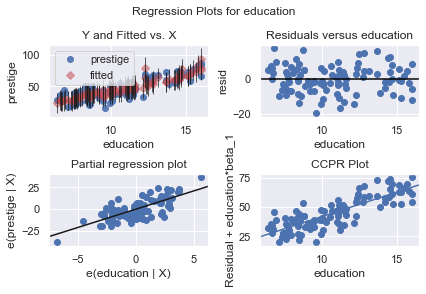

In [144]:
fig = sm.graphics.plot_regress_exog(model1, "education")

fig.tight_layout(pad=1.0)
plt.savefig('./images/regression_education.jpg')

eval_env: 1


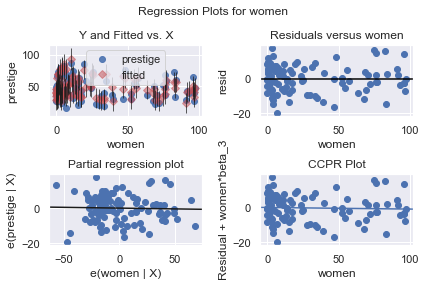

In [145]:
fig = sm.graphics.plot_regress_exog(model1, "women")

fig.tight_layout(pad=1.0)
plt.savefig('./images/regression_women.jpg')